In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/User/Downloads/Micro-Credit-Project/Micro Credit Project/Data file.csv')

In [3]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

<AxesSubplot:>

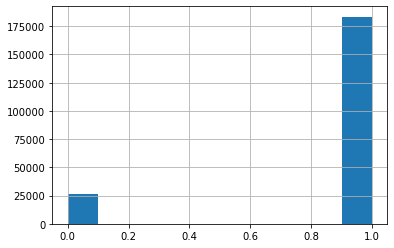

In [4]:
df['label'].hist()

In [5]:
print('Non defaulters --->',df['label'].value_counts()[1]/df['label'].shape[0] * 100,'%')
print('Defaulters     --->',df['label'].value_counts()[0]/df['label'].shape[0] * 100,'%')


Non defaulters ---> 87.5177129007171 %
Defaulters     ---> 12.482287099282896 %


In [6]:
## here the data is imbalanced

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [8]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [9]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

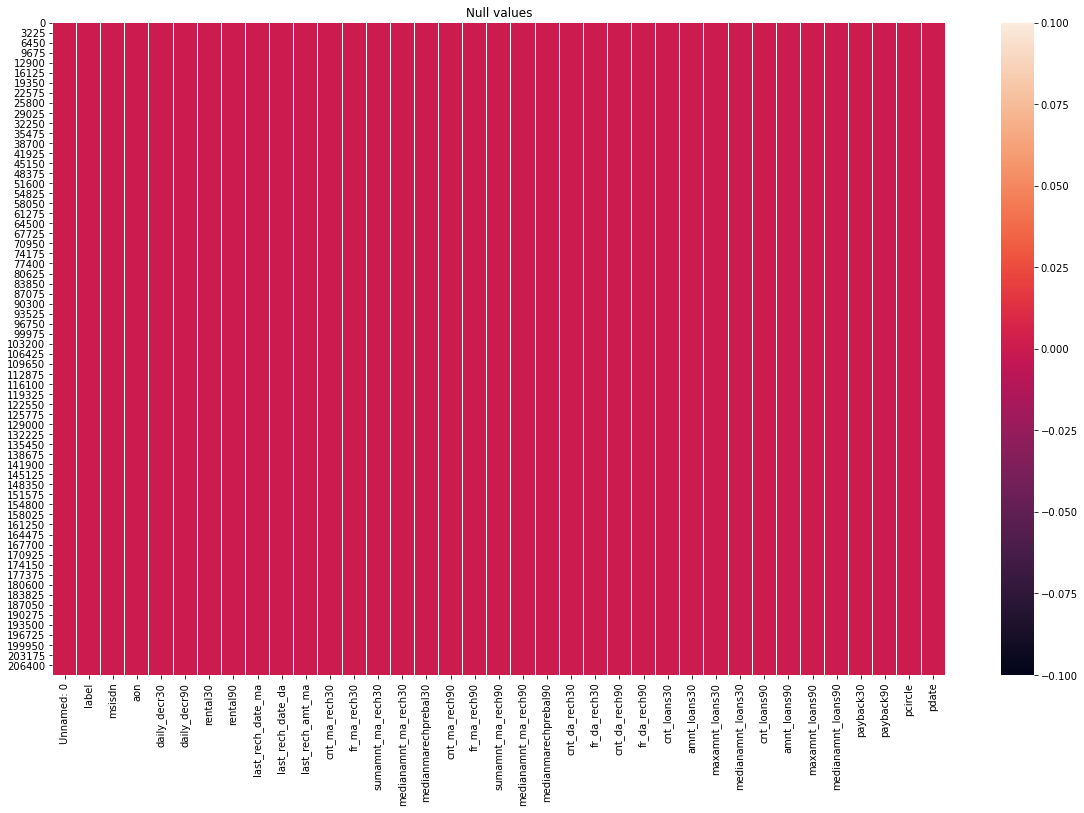

In [10]:
plt.figure(figsize=(20,12))
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

In [11]:
x = df.drop('label',axis=1)
x.shape

(209593, 36)

In [12]:
y = df['label']
y.shape

(209593,)

In [13]:
df[df['label']==1].shape

(183431, 37)

In [14]:
df[df['label']==0].shape

(26162, 37)

In [15]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [16]:
os = RandomOverSampler()

In [17]:
x_res,y_res = os.fit_resample(x,y)

In [18]:
x_res.shape ,y_res.shape

((366862, 36), (366862,))

In [19]:
x.shape , y.shape

((209593, 36), (209593,))

In [20]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resample dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 183431, 0: 26162})
Resample dataset shape Counter({0: 183431, 1: 183431})


In [21]:
Counter(y)

Counter({0: 26162, 1: 183431})

In [22]:
Counter(y_res)

Counter({0: 183431, 1: 183431})

In [23]:
##y_res[y_res==1].shape

In [24]:
##y_res[y_res==0].shape

In [25]:
x_res.columns

Index(['Unnamed: 0', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [26]:
x_res = x_res.drop(['msisdn','pdate','pcircle'],axis=1)

In [27]:
df_res = pd.concat((x_res,y_res),axis=1)

In [28]:
df_res.head()

,Unnamed: 0,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,label
0,1,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0
1,2,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,1
2,3,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,1
3,4,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,1
4,5,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,1


In [29]:
df_res.shape

(366862, 34)

In [30]:
df_res.isnull().sum()

Unnamed: 0              0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
label                   0
dtype: int64

In [31]:
print('Non defaulters --->',df_res['label'].value_counts()[1]/df_res['label'].shape[0] * 100,'%')
print('Defaulters     --->',df_res['label'].value_counts()[0]/df_res['label'].shape[0] * 100,'%')

Non defaulters ---> 50.0 %
Defaulters     ---> 50.0 %


In [32]:
df_res.shape

(366862, 34)

In [33]:
## checking casually how the model is performing before data cleaning just o get an idea

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.25,random_state=0)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lg = LogisticRegression()

In [38]:
lg.fit(x_res,y_res)

LogisticRegression()

In [39]:
y_pred = lg.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.733568842949976
[[36961  8593]
 [15843 30319]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75     45554
           1       0.78      0.66      0.71     46162

    accuracy                           0.73     91716
   macro avg       0.74      0.73      0.73     91716
weighted avg       0.74      0.73      0.73     91716



In [42]:
37089/(37089+15788) ##70% it is correctly predicting label 0

0.7014202772471964

In [43]:
30374/(30374+8465) ##78% it is correctly predicting label 1

0.7820489713947321

<AxesSubplot:xlabel='aon'>

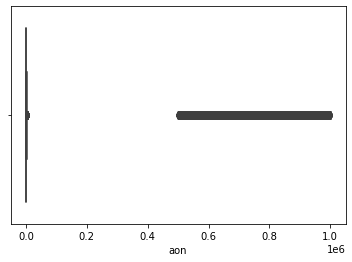

In [44]:
sns.boxplot(df['aon'])   ##lots of outliers in aon column

## Data cleaning

In [45]:
df2 = df_res.copy()

In [46]:
df2['label'].value_counts()

1    183431
0    183431
Name: label, dtype: int64

In [47]:
df2.head()

,Unnamed: 0,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,label
0,1,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0
1,2,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,1
2,3,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,1
3,4,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,1
4,5,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,1


In [48]:
print('10--',np.percentile(df['aon'],10))
print('20--',np.percentile(df['aon'],20))
print('30--',np.percentile(df['aon'],30))
print('40--',np.percentile(df['aon'],40))
print('50--',np.percentile(df['aon'],50))
print('60--',np.percentile(df['aon'],60))
print('70--',np.percentile(df['aon'],70))
print('80--',np.percentile(df['aon'],80))
print('90--',np.percentile(df['aon'],90))
print('95--',np.percentile(df['aon'],95))
print('96--',np.percentile(df['aon'],96))
print('97--',np.percentile(df['aon'],97))
print('98--',np.percentile(df['aon'],98))
print('99--',np.percentile(df['aon'],99))
print('99.1--',np.percentile(df['aon'],99.1))
print('99.2--',np.percentile(df['aon'],99.2))
print('99.3--',np.percentile(df['aon'],99.3))
print('99.4--',np.percentile(df['aon'],99.4))
print('99.5--',np.percentile(df['aon'],99.5))
print('99.6--',np.percentile(df['aon'],99.6))
print('99.7--',np.percentile(df['aon'],99.7))
print('99.8--',np.percentile(df['aon'],99.8))
print('99.9--',np.percentile(df['aon'],99.9))
print(np.percentile(df['aon'],100))

10-- 132.0
20-- 204.0
30-- 292.0
40-- 400.0
50-- 527.0
60-- 682.0
70-- 869.0
80-- 1113.0
90-- 1411.0
95-- 1749.0
96-- 1828.0
97-- 1921.0
98-- 2040.0
99-- 2420.079999999987
99.1-- 549286.9308460492
99.2-- 596990.0530716397
99.3-- 646736.2224468965
99.4-- 697756.808224141
99.5-- 749902.1577462554
99.6-- 801827.7973970415
99.7-- 846886.9435954761
99.8-- 895235.6163738256
99.9-- 948236.8923435013
999860.755167902


In [49]:
## handling aon feature

In [50]:
df2['aon'].value_counts()

92.000000        821
94.000000        813
99.000000        808
108.000000       795
95.000000        766
                ... 
593099.546502      1
894868.658506      1
882663.918310      1
950834.295130      1
657727.407059      1
Name: aon, Length: 4507, dtype: int64

In [51]:
df2[df2['aon']>2420].shape

(3833, 34)

In [52]:
df3 = df2[df2['aon']<=2000]

In [53]:
df3.shape[0] / df2.shape[0] * 100

97.86377438927988

In [54]:
## age can never be negative and fraction ..so it may be typing or obsevation error,,,so making them positive and making fractions as integer values 

In [55]:
def age(x):  ##function making -ve days to +ve
    if x<0 :
        return (-1*x)
    else :
        return x

In [56]:
df3.shape

(359025, 34)

In [57]:
df3['aon'] = df3['aon'].apply(lambda x:age(x))

In [58]:
df3.shape

(359025, 34)

In [59]:
df3[df3['aon']<0] ##no negative days value 

,Unnamed: 0,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,label


<AxesSubplot:xlabel='aon'>

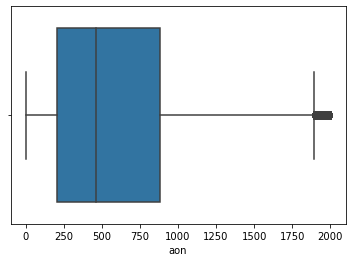

In [60]:
sns.boxplot(df3['aon'])  ##outliers is removed in aon column

In [61]:
def fraction(x):  ##function making fraction day value to integer values since days can never be fraction
    if type(x)==float:
        return int(x)

In [62]:
df3['aon'].value_counts()

92.0      821
94.0      813
99.0      808
108.0     795
95.0      766
         ... 
1975.0     14
1949.0     14
1956.0     13
1921.0     10
1784.0      7
Name: aon, Length: 2000, dtype: int64

In [63]:
fraction(100.34)

100

In [64]:
df2[df2['aon']<0].shape

(4531, 34)

In [65]:
df3[df3['aon']<0].shape

(0, 34)

In [66]:
print('% data remaining',df3.shape[0]/df2.shape[0] * 100)

% data remaining 97.86377438927988


In [67]:
##handling last_rech_ma and last_reach_data features

<AxesSubplot:xlabel='last_rech_date_ma'>

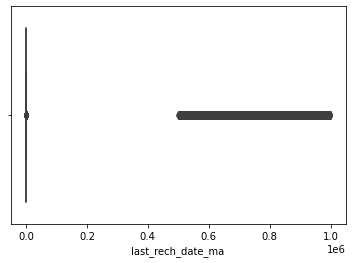

In [68]:
sns.boxplot(df3['last_rech_date_ma']) ##lots of outlliers

In [69]:
print(np.percentile(df2['last_rech_date_ma'],10))
print(np.percentile(df2['last_rech_date_ma'],20))
print(np.percentile(df2['last_rech_date_ma'],30))
print(np.percentile(df2['last_rech_date_ma'],40))
print(np.percentile(df2['last_rech_date_ma'],50))
print(np.percentile(df2['last_rech_date_ma'],60))
print(np.percentile(df2['last_rech_date_ma'],70))
print(np.percentile(df2['last_rech_date_ma'],80))
print(np.percentile(df2['last_rech_date_ma'],90))
print(np.percentile(df2['last_rech_date_ma'],95))
print(np.percentile(df2['last_rech_date_ma'],96))
print(np.percentile(df2['last_rech_date_ma'],97))
print(np.percentile(df2['last_rech_date_ma'],98))
print(np.percentile(df2['last_rech_date_ma'],99))
print(np.percentile(df2['last_rech_date_ma'],99.1))
print(np.percentile(df2['last_rech_date_ma'],99.2))
print(np.percentile(df2['last_rech_date_ma'],99.3))
print(np.percentile(df2['last_rech_date_ma'],99.4))
print(np.percentile(df2['last_rech_date_ma'],99.5))
print(np.percentile(df2['last_rech_date_ma'],99.6))
print(np.percentile(df2['last_rech_date_ma'],99.7))
print(np.percentile(df2['last_rech_date_ma'],99.8))
print(np.percentile(df2['last_rech_date_ma'],99.9))
print(np.percentile(df2['last_rech_date_ma'],100))

0.0
0.0
1.0
2.0
3.0
4.0
7.0
10.0
20.0
33.0
38.0
42.0
50.0
69.0
72.0
75.0
79.0
83.0
87.0
575479.206629097
664758.6718497418
785195.5714868379
895473.5173565862
998650.3777327021


In [70]:
df3[df3['last_rech_amt_ma']<80].shape

(74629, 34)

In [71]:
df3[df3['last_rech_amt_ma']>80].shape

(284396, 34)

In [72]:
## there are outliers in last_rech_amt_ma features but they are signifucant and are lying in the iqr

In [73]:
Q1 = df['last_rech_amt_ma'].quantile(0.25)
Q3 = df['last_rech_amt_ma'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

1539.0


In [74]:
((df3['last_rech_amt_ma'] < Q1 - 1.5*IQR) | (df3['last_rech_amt_ma'] > Q3 + 1.5*IQR)).shape ##all data is required in these feature

(359025,)

In [75]:
df3.shape

(359025, 34)

In [76]:
from itertools import islice, count
## creating function for iterating float values
def iter_range(start, stop, step):
    if step == 0:
        raise ValueError("Step could not be NULL")
    length = int(abs(stop - start) / step)
    return islice(count(start, step), length)

for it in iter_range(0, 10, 1.10):
    print ("{0:.1f}".format(it), end = " ")

0.0 1.1 2.2 3.3 4.4 5.5 6.6 7.7 8.8 

In [77]:
for i in iter_range(99,100,0.1):
    print(i)

99
99.1
99.19999999999999
99.29999999999998
99.39999999999998
99.49999999999997
99.59999999999997
99.69999999999996
99.79999999999995
99.89999999999995


In [78]:
## handling daily_decr_30 and daily_decr_90 features

In [79]:
##code for finding outliers manually
for i in range(10,91,10):
    print(i,'th percentile -->',np.percentile(df2['daily_decr30'],i))
for i in range(91,99):
    print(i,'th percentile -->',np.percentile(df2['daily_decr30'],i))
    
for i in iter_range(99,100,0.1):
    print('{0:0.1f}'.format(i),'th percentile -->',np.percentile(df2['daily_decr30'],i))

10 th percentile --> 0.0
20 th percentile --> 6.4
30 th percentile --> 21.806666666666697
40 th percentile --> 64.78879999999997
50 th percentile --> 517.17
60 th percentile --> 1209.63333333333
70 th percentile --> 2621.5975999999996
80 th percentile --> 5420.0
90 th percentile --> 11109.0
91 th percentile --> 12011.0
92 th percentile --> 13070.728959999999
93 th percentile --> 14294.0
94 th percentile --> 15714.835759999944
95 th percentile --> 17530.992133333337
96 th percentile --> 19654.834399999992
97 th percentile --> 22579.169999999984
98 th percentile --> 26928.535206666566
99.0 th percentile --> 34881.884920000026
99.1 th percentile --> 36252.62749999997
99.2 th percentile --> 37666.44799999986
99.3 th percentile --> 39489.33431333273
99.4 th percentile --> 41631.833999999915
99.5 th percentile --> 44075.03499999858
99.6 th percentile --> 47302.22399999946
99.7 th percentile --> 51906.3087929976
99.8 th percentile --> 58863.235999988625
99.9 th percentile --> 71816.9189999956

<AxesSubplot:xlabel='daily_decr30'>

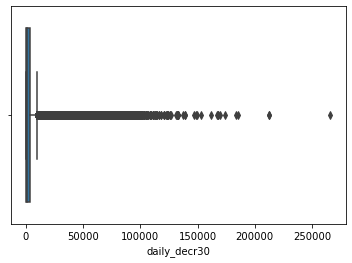

In [80]:
sns.boxplot(df3['daily_decr30'])

In [81]:
df3[df3['daily_decr30']>40000].shape

(2398, 34)

In [82]:
df3[df3['daily_decr30']<=40000].shape

(356627, 34)

In [83]:
df3.shape

(359025, 34)

In [84]:
df3 = df3[df3['daily_decr30']<=40000]

<AxesSubplot:xlabel='daily_decr30'>

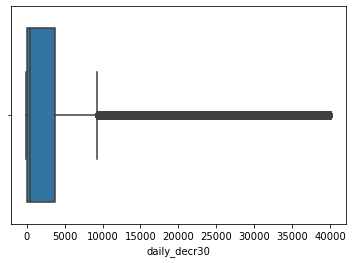

In [85]:
sns.boxplot(df3['daily_decr30'])

In [86]:
for i in range(10,91,10):
    print(i,'th percentile -->',np.percentile(df2['daily_decr90'],i))
for i in range(91,99):
    print(i,'th percentile -->',np.percentile(df2['daily_decr90'],i))
    
for i in iter_range(99,100,0.1):
    print('{0:0.1f}'.format(i),'th percentile -->',np.percentile(df2['daily_decr90'],i))

10 th percentile --> 0.0
20 th percentile --> 6.57533333333333
30 th percentile --> 22.276
40 th percentile --> 65.53379999999999
50 th percentile --> 523.0
60 th percentile --> 1227.4480000000005
70 th percentile --> 2684.97
80 th percentile --> 5677.923999999985
90 th percentile --> 12189.613000000003
91 th percentile --> 13297.96748333337
92 th percentile --> 14576.5368
93 th percentile --> 16056.57
94 th percentile --> 17799.920799999913
95 th percentile --> 19877.688000000006
96 th percentile --> 22456.559999999998
97 th percentile --> 26056.539299999982
98 th percentile --> 31389.45279999995
99.0 th percentile --> 41230.738300000055
99.1 th percentile --> 42808.156270000036
99.2 th percentile --> 44666.29247999985
99.3 th percentile --> 46743.16300999932
99.4 th percentile --> 49564.71295999843
99.5 th percentile --> 52795.79549999921
99.6 th percentile --> 56663.73955999567
99.7 th percentile --> 62060.600479993474
99.8 th percentile --> 69549.16327999909
99.9 th percentile --> 

In [87]:
print('{}% of data is remaining'.format(df3.shape[0] / df2.shape[0] *100))

97.21012260741097% of data is remaining


<AxesSubplot:xlabel='daily_decr90'>

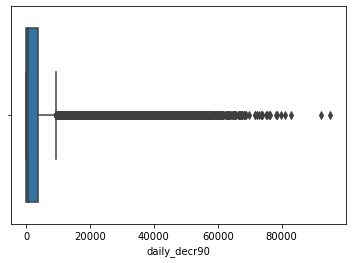

In [88]:
sns.boxplot(df3['daily_decr90'])

In [89]:
Q1 = df3['daily_decr90'].quantile(0.25)
Q3 = df3['daily_decr90'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

3779.0183333333284


In [90]:
df3[(df3['daily_decr90'] > (Q1 - 1.5*IQR)) | (df3['daily_decr90'] < (Q3 + 1.5*IQR))].shape

(356627, 34)

In [91]:
df3.shape

(356627, 34)

In [92]:
df3 = df3[df3['daily_decr90'] < 40000]

<AxesSubplot:xlabel='daily_decr90'>

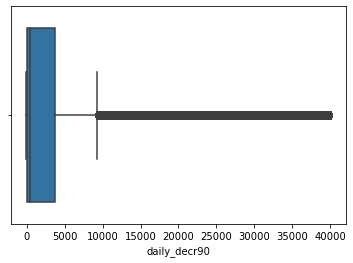

In [93]:
sns.boxplot(df3['daily_decr90'])

In [94]:
print('{}% of data is remaining'.format(df3.shape[0]/df2.shape[0] * 100))

96.80424791883596% of data is remaining


In [95]:
df3['daily_decr30'] = df3['daily_decr30'].apply(lambda x:age(x))

In [96]:
df3[df3['daily_decr30']<0].shape

(0, 34)

In [97]:
df3.shape

(355138, 34)

In [98]:
df3['daily_decr90'] = df3['daily_decr90'].apply(lambda x:age(x))

In [99]:
df3.shape

(355138, 34)

In [100]:
df3.shape[0]/df2.shape[0]

0.9680424791883596

In [101]:
## handling features no of last_rech_date_ma and last_rech_date_da

In [102]:
df3[df3['last_rech_date_da'] == 0].shape

(345181, 34)

In [103]:
df3['last_rech_date_da'].value_counts()

0.000000         345181
7.000000            284
17.000000           251
8.000000            249
13.000000           228
                  ...  
886093.582725         1
822346.916306         1
585558.444378         1
974876.728375         1
820092.591224         1
Name: last_rech_date_da, Length: 1136, dtype: int64

In [104]:
##lst = []
##for i in (df2['last_rech_date_da']):
  ##  if type(i) == float :
    ##    lst.append(i)
        
         

In [105]:
##len(lst)

In [106]:
df3.shape

(355138, 34)

In [107]:
df3['last_rech_date_da'].value_counts()

0.000000         345181
7.000000            284
17.000000           251
8.000000            249
13.000000           228
                  ...  
886093.582725         1
822346.916306         1
585558.444378         1
974876.728375         1
820092.591224         1
Name: last_rech_date_da, Length: 1136, dtype: int64

In [108]:
## i m working on last_rech_date_da and trying to write a code to find out float values or fraction value

In [109]:
##check dis code to find fraction values
##index=[]
##for i in range(len(data['age_on_net'])):
  ##  if int(data['age_on_net'].iloc[i]) < data['age_on_net'].iloc[i]:
    ##    index.append(i)

In [110]:
##removing remaining outliers using z score

In [111]:
df3.columns

Index(['Unnamed: 0', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'label'],
      dtype='object')

In [112]:
df3.shape

(355138, 34)

In [113]:
from scipy.stats import zscore 
z=zscore(df3)
df4=df3[(z<3).all(axis=1)]
df4.shape

(258519, 34)

In [114]:
print('{}% of data is remaining'.format(df4.shape[0]/df2.shape[0]))

0.7046764178355894% of data is remaining


In [115]:
df2.corr()

,Unnamed: 0,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,label
Unnamed: 0,1.000000,-0.000038,0.002290,0.002523,-0.009010,-0.007538,-0.000066,0.002272,-0.006337,0.002908,...,0.001997,-0.001396,-0.003501,-0.002987,0.000577,-0.000109,-0.004211,-0.001174,0.000476,0.000759
aon,-0.000038,1.000000,0.000036,-0.000532,-0.006873,-0.006759,0.002402,-0.003935,0.002965,-0.004766,...,-0.002549,-0.003096,0.004455,0.001902,-0.002720,-0.003256,0.003081,0.003504,0.002321,-0.005212
daily_decr30,0.002290,0.000036,1.000000,0.979972,0.384954,0.417381,0.000024,0.000779,0.292094,0.498577,...,0.509508,-0.002253,0.010869,0.007869,0.592471,0.411226,-0.013765,0.056363,0.073764,0.310200
daily_decr90,0.002523,-0.000532,0.979972,1.000000,0.377782,0.426433,0.000583,0.000426,0.279366,0.476718,...,0.488969,-0.001913,0.015184,0.008383,0.596363,0.406237,-0.012255,0.048232,0.066021,0.309964
rental30,-0.009010,-0.006873,0.384954,0.377782,1.000000,0.964175,-0.002050,0.005673,0.144146,0.211963,...,0.211121,-0.001477,-0.005082,0.000262,0.262139,0.225813,-0.021865,0.075997,0.098082,0.092798
rental90,-0.007538,-0.006759,0.417381,0.426433,0.964175,1.000000,-0.002016,0.005108,0.145166,0.225790,...,0.225121,-0.001889,0.001164,0.001909,0.302140,0.246663,-0.020636,0.073752,0.103686,0.126231
last_rech_date_ma,-0.000066,0.002402,0.000024,0.000583,-0.002050,-0.002016,1.000000,0.005047,-0.004512,0.003925,...,0.003316,0.000443,0.002945,0.004091,0.003133,-0.001234,0.004171,-0.001745,-0.002742,0.006003
last_rech_date_da,0.002272,-0.003935,0.000779,0.000426,0.005673,0.005108,0.005047,1.000000,0.001083,0.000711,...,-0.000115,0.001397,-0.000358,-0.002271,0.000233,0.001032,-0.001749,-0.003231,-0.002952,0.003439
last_rech_amt_ma,-0.006337,0.002965,0.292094,0.279366,0.144146,0.145166,-0.004512,0.001083,1.000000,0.094043,...,0.080942,-0.003578,0.042426,0.001989,0.083840,0.159883,0.034706,0.012451,0.023308,0.204513
cnt_ma_rech30,0.002908,-0.004766,0.498577,0.476718,0.211963,0.225790,0.003925,0.000711,0.094043,1.000000,...,0.777173,-0.002688,-0.020638,0.014382,0.719593,0.230656,-0.028666,0.097881,0.079588,0.409131


In [116]:
## selecting features and removing features which are most dependent

In [117]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [118]:
correlation(df4,0.8)

{'amnt_loans30',
 'amnt_loans90',
 'cnt_loans90',
 'cnt_ma_rech90',
 'daily_decr90',
 'medianamnt_loans90',
 'medianamnt_ma_rech90',
 'payback90',
 'rental90',
 'sumamnt_ma_rech30',
 'sumamnt_ma_rech90'}

In [119]:
## all this features are 80% correlated with each other ..hence they can be removed as they are dependent

In [120]:
df5 = df4.drop(['amnt_loans30','amnt_loans90','cnt_loans90','cnt_ma_rech90','daily_decr90','medianamnt_loans90','medianamnt_ma_rech90','rental90','sumamnt_ma_rech90'],axis=1)

In [121]:
df5.head()

,Unnamed: 0,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,maxamnt_loans90,payback30,payback90,label
0,1,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,...,0.0,0,0,2,6.0,0.0,6,29.000000,29.000000,0
2,3,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,...,0.0,0,0,1,6.0,0.0,6,0.000000,0.000000,1
3,4,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,...,0.0,0,0,2,6.0,0.0,6,0.000000,0.000000,1
4,5,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,...,0.0,0,0,7,6.0,0.0,6,2.333333,2.333333,1
5,6,568.0,2257.362667,368.13,2.0,0.0,1539,4,10.0,6156.0,...,0.0,0,0,3,6.0,0.0,6,11.000000,8.333333,1


In [122]:
##df3.skew()

In [123]:
## most of the data are very skewed ..we can handle them using transformation

In [124]:
#from scipy import stats

In [125]:
##df5 = stats.boxcox(df4) use to transfrom 1 dimensional array




In [126]:
##As expected, we cannot use the transform on the raw data because it is not strictly positive.
##One way to solve this problem is to use a MixMaxScaler transform first to scale the data to positive values, then apply the transform.
##We can use a Pipeline object to apply both transforms in sequence;

In [127]:
##df5 = df3.drop(['Unnamed: 0','label'],axis=1)

In [128]:
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import PowerTransformer
#from sklearn.pipeline import Pipeline


In [129]:
#mms = MinMaxScaler()
#df6 = mms.fit_transform(df3)
#pt = PowerTransformer()
#df7 = pd.DataFrame(pt.fit_transform(df6),columns=df3.columns)

In [130]:
#df7.skew()

In [131]:
#df8 = df7.copy()

In [132]:
#df8['cnt_da_rech90'] = np.sqrt(df8['cnt_da_rech90']
#df8['last_rech_date_da'] = np.sqrt(df8['last_rech_date_da'])
#df8['last_rech_date_ma'] = np.sqrt(df8['last_rech_date_ma'])
#df8['fr_ma_rech30'] = np.sqrt(df8['fr_ma_rech30'])
#df8['cnt_da_rech30'] = np.sqrt(df8['cnt_da_rech30'])
#df8['fr_da_rech90'] = np.sqrt(df8['fr_da_rech90'])
#df8['maxamnt_loans30'] = np.sqrt(df8['maxamnt_loans30'])
#df8['medianamnt_loans30'] = np.sqrt(df8['medianamnt_loans30'])

In [133]:
##col = df5.columns
#for i in col :
  #  plt.subplots()
   # plt.xlabel(i)
    #sns.distplot(df6[i])

In [134]:
## almost skweness has been removed

In [135]:
x = df5.drop('label',axis=1)
y = df5['label']

In [136]:
print(x.shape)
print(y.shape)

(258519, 24)
(258519,)


In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(206815, 24)
(51704, 24)
(206815,)
(51704,)


In [138]:
##from sklearn.linear_model import LogisticRegression
#lg = LogisticRegression()
#lg.fit(x_train,y_train)

In [139]:
lg.fit(x_train,y_train)

LogisticRegression()

In [140]:
y_pred = lg.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7336763113105369


In [141]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[24625  4782]
 [ 8988 13309]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78     29407
           1       0.74      0.60      0.66     22297

    accuracy                           0.73     51704
   macro avg       0.73      0.72      0.72     51704
weighted avg       0.73      0.73      0.73     51704



In [142]:
lg.score(x_train,y_train)

0.735541425912047

In [143]:
lg.score(x_test,y_test)

0.7336763113105369

In [144]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lg,x,y,cv=5).mean()
print(cv_score)

0.7192040042951253


In [145]:
##difference between accuracy_score and cross val score is less.. so there is no overfitting

In [146]:
df6 = df5.copy()

In [147]:
df6.skew()

Unnamed: 0               0.000037
aon                      0.992368
daily_decr30             2.667411
rental30                 2.442072
last_rech_date_ma        2.924044
last_rech_date_da       12.366105
last_rech_amt_ma         2.141178
cnt_ma_rech30            1.574703
fr_ma_rech30             2.470923
sumamnt_ma_rech30        2.001251
medianamnt_ma_rech30     1.720565
medianmarechprebal30     8.659371
fr_ma_rech90             2.348374
medianmarechprebal90     4.666390
cnt_da_rech30           50.699472
fr_da_rech30             0.000000
cnt_da_rech90            8.081865
fr_da_rech90             0.000000
cnt_loans30              2.011343
maxamnt_loans30         58.009852
medianamnt_loans30       6.572917
maxamnt_loans90        -14.000756
payback30                3.297486
payback90                3.071260
label                    0.281530
dtype: float64

In [148]:
## using standard scaler to improve the skewness and accuracy 

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df8_x = pd.DataFrame(ss.fit_transform(df6.drop('label',axis=1)),columns=df6.drop('label',axis=1).columns)

In [151]:
x2 = df8_x
y2 = df6['label']

In [152]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=1)

In [153]:
lg.fit(x2_train,y2_train)

LogisticRegression()

In [154]:
lg.score(x2_test,y2_test)

0.7631324462323998

In [155]:
y2_pred=lg.predict(x2_test)

In [156]:
print(accuracy_score(y2_pred,y2_test))

0.7631324462323998


In [157]:
print(confusion_matrix(y2_test,y2_pred))
print(classification_report(y2_test,y2_pred))

[[24675  4732]
 [ 7515 14782]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80     29407
           1       0.76      0.66      0.71     22297

    accuracy                           0.76     51704
   macro avg       0.76      0.75      0.75     51704
weighted avg       0.76      0.76      0.76     51704



In [158]:
## using standard scaler gives better results

In [159]:
cv2_score = cross_val_score(lg,x2,y2,cv=5).mean()
print(cv2_score)

0.7332883260273901


In [160]:
## cross val score has also improved

In [161]:
## now i will test with different models and find the best model

In [162]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [163]:
##from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
##knn = KNeighborsClassifier()
##param = {'n_neighbors' : [4,5,6,7,8]}

##GS  = RandomizedSearchCV(knn,param,cv=5,n_jobs=-1)
##GS.fit(x_train,y_train)

In [164]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predkn = knn.predict(x_test)
print(accuracy_score(y_test,y_predkn))
print(confusion_matrix(y_test,y_predkn))
print(classification_report(y_test,y_predkn))

0.8506885347361907
[[28713   694]
 [ 7026 15271]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     29407
           1       0.96      0.68      0.80     22297

    accuracy                           0.85     51704
   macro avg       0.88      0.83      0.84     51704
weighted avg       0.87      0.85      0.85     51704



In [165]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_predgnb = gnb.predict(x_test)
print(accuracy_score(y_test,y_predgnb))
print(confusion_matrix(y_test,y_predgnb))
print(classification_report(y_test,y_predgnb))

0.7306397957604828
[[24626  4781]
 [ 9146 13151]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78     29407
           1       0.73      0.59      0.65     22297

    accuracy                           0.73     51704
   macro avg       0.73      0.71      0.72     51704
weighted avg       0.73      0.73      0.73     51704



In [166]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preddt = dt.predict(x_test)
print(accuracy_score(y_test,y_preddt))
print(confusion_matrix(y_test,y_preddt))
print(classification_report(y_test,y_preddt))

0.9526729073185827
[[29360    47]
 [ 2400 19897]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     29407
           1       1.00      0.89      0.94     22297

    accuracy                           0.95     51704
   macro avg       0.96      0.95      0.95     51704
weighted avg       0.96      0.95      0.95     51704



In [167]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predrfc = rfc.predict(x_test)
print(accuracy_score(y_test,y_predrfc))
print(confusion_matrix(y_test,y_predrfc))
print(classification_report(y_test,y_predrfc))

0.9751276496982826
[[29362    45]
 [ 1241 21056]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     29407
           1       1.00      0.94      0.97     22297

    accuracy                           0.98     51704
   macro avg       0.98      0.97      0.97     51704
weighted avg       0.98      0.98      0.98     51704



In [168]:
cv_svore = cross_val_score(rfc,x,y,cv=5)
cv_score.mean()

0.7192040042951253

In [169]:
cv_scoredt = cross_val_score(dt,x,y,cv=5)
cv_scoredt.mean()

0.6574020195819091

In [170]:
cv_scoregn = cross_val_score(gnb,x,y,cv=5)
cv_scoregn.mean()

0.7200978980539864

In [171]:
cv_scorelg = cross_val_score(lg,x,y,cv=5) 
cv_scorelg.mean()

0.7192040042951253

In [172]:
cv_scoreknn = cross_val_score(knn,x,y,cv=5)
cv_scoreknn.mean()

0.5736522088757043

In [173]:
result=pd.DataFrame({'Models':['LogisticRegression','KNearestNeighbors','Naive bayes','DecisionTreeClassifier','RandomForestClassifier'],'Accuracy Score':[0.73,0.85,0.73,0.95,0.97],'Cross_val_score':[0.72,0.57,0.72,0.65,0.72]})
result

,Models,Accuracy Score,Cross_val_score
0,LogisticRegression,0.73,0.72
1,KNearestNeighbors,0.85,0.57
2,Naive bayes,0.73,0.72
3,DecisionTreeClassifier,0.95,0.65
4,RandomForestClassifier,0.97,0.72


In [ ]:
##so logistic regression and naive bayes are the best model with no overfitting ..

In [174]:
import joblib

In [175]:
joblib.dump(lg,'Micro_credit_defaulter.pkl')

['Micro_credit_defaulter.pkl']